In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-11-08 15:43:58.879081: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 15:43:58.879206: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 15:43:58.881074: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-08 15:43:59.052919: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df=pd.read_excel("preprocessed.xlsx")

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['HaveWorkedWith'], axis=1, inplace=True)
print(df.columns)

Index(['Age', 'Accessibility', 'EdLevel', 'Employment', 'MentalHealth',
       'MainBranch', 'YearsCode', 'YearsCodePro', 'PreviousSalary',
       'ComputerSkills', 'Employed'],
      dtype='object')


In [4]:
df.head(10)

,Age,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
0,1,1,2,1,1,1,7,4,51552,4,0
1,1,1,1,1,1,1,12,5,46482,12,1
2,1,1,2,1,1,1,15,6,77290,7,0
3,1,1,1,1,1,1,9,6,46135,13,0
4,2,1,5,0,1,2,40,30,160932,2,0
5,1,1,2,1,1,1,9,2,38915,5,0
6,2,1,2,1,1,1,26,18,77831,17,1
7,1,1,2,1,1,2,14,5,81319,4,0
8,2,1,1,1,1,1,39,21,68507,3,0
9,2,1,2,1,1,1,20,16,37752,6,0


In [5]:
def split(df, train_split=0.8, val_split=0.1, test_split=0.1):
    df_sample = df.sample(frac=1, random_state=12)
    indices_or_sections = [int(train_split * len(df)), int((1 - val_split - test_split) * len(df))]
    train, val, test = np.split(df_sample, indices_or_sections)
    return train, val, test
train, val, test=split(df, 0.9,0,0.1)
train_x=train.drop(['Employed'], axis=1)
train_y=train['Employed']

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
    )
col_train=['Age', 'Accessibility', 'EdLevel',
       'YearsCode',
       'ComputerSkills']
history=model.fit(train_x[col_train], train_y,
                  validation_split = 0.15, 
                  epochs=20,
                  verbose=2
                 )

Epoch 1/20
1757/1757 - 23s - loss: 1.0521 - accuracy: 0.7642 - val_loss: 0.5219 - val_accuracy: 0.7365 - 23s/epoch - 13ms/step
Epoch 2/20
1757/1757 - 18s - loss: 0.4941 - accuracy: 0.7805 - val_loss: 0.4692 - val_accuracy: 0.7822 - 18s/epoch - 10ms/step
Epoch 3/20
1757/1757 - 18s - loss: 0.4909 - accuracy: 0.7722 - val_loss: 0.4988 - val_accuracy: 0.7836 - 18s/epoch - 10ms/step
Epoch 4/20
1757/1757 - 18s - loss: 0.4822 - accuracy: 0.7825 - val_loss: 0.5500 - val_accuracy: 0.7420 - 18s/epoch - 10ms/step
Epoch 5/20
1757/1757 - 18s - loss: 0.5235 - accuracy: 0.7473 - val_loss: 0.4742 - val_accuracy: 0.7713 - 18s/epoch - 10ms/step
Epoch 6/20
1757/1757 - 18s - loss: 0.5109 - accuracy: 0.7741 - val_loss: 0.4901 - val_accuracy: 0.7787 - 18s/epoch - 10ms/step
Epoch 7/20
1757/1757 - 18s - loss: 0.5005 - accuracy: 0.7701 - val_loss: 0.4713 - val_accuracy: 0.7802 - 18s/epoch - 10ms/step
Epoch 8/20
1757/1757 - 18s - loss: 0.4867 - accuracy: 0.7742 - val_loss: 0.4577 - val_accuracy: 0.7839 - 18s/ep

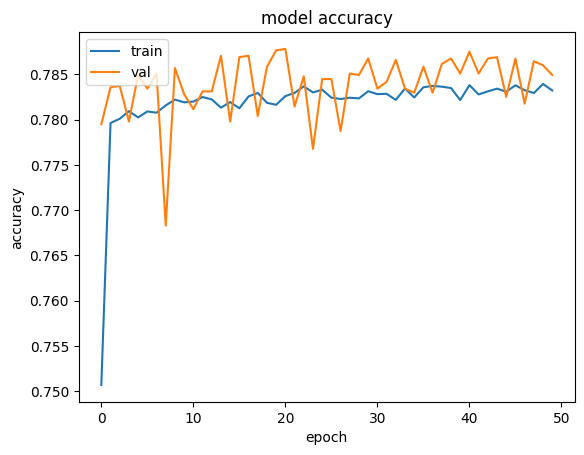

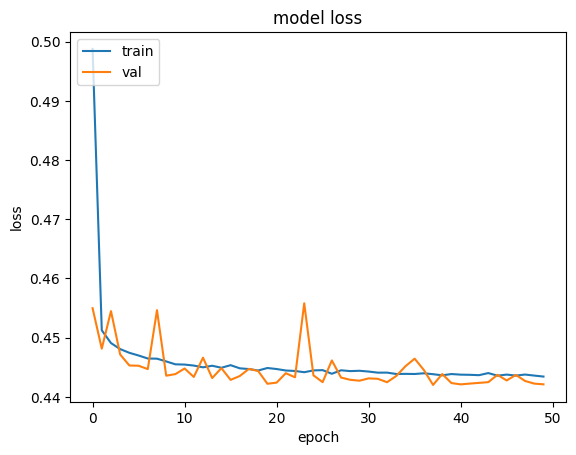

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"], loc="upper left")
plt.show()

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                132       
                                                                 
 dense_10 (Dense)            (None, 10)                130       
                                                                 
 dense_11 (Dense)            (None, 2)                 22        
                                                                 
Total params: 284 (1.11 KB)
Trainable params: 284 (1.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
